In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

Para la division de los datos del 80% para entrenamiento y 20% para prueba utilice la libreria from sklearn.model_selection import train_test_split que nos ayudara a dividir un conjunto de datos en subconjuntos esta division se realizara en forma aleatoria tanta para el entrenamineto como para la prueba

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/hotel_bookings.csv')

In [4]:
print(data)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

Mi Y para el ejercicicio es la columna 2 is_canceled que nos indica si realizo una reserva o no

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
columnas_eliminar = ['company']
data = data.drop(columnas_eliminar, axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [9]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

Con el siguiente codigo converti todas las columnas que estaban en objeto a numeros para eso utilice la libreria LabelEncoder que es utilizada para transformar etiquetas de texto en numeros enteros


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
#llenar datos vacios
columnas_especificas = ['children', 'agent']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

como en mi data set me di cuenta que en 2 columnas no estaban con los datos completos asi que opte de sacar la media de las columnas para remplazar con la misma cantidad de datos que utiliza el metodo mean() de la libreria pandas

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
# Division de dataset en entrenamiento y prueba
entrenamiento_data, prueba_data = train_test_split(data, test_size=0.2, random_state=42)

Se hace la division de data set de entrenamiento y de prueba utilizando la funcion train_test_split con los siguientes parametros data que seria nuestro datasets que queremos dividir despues test_size = 0.2 que nos va a indicar la proporcion del conjunto de datos que lo tomaremos para la prueba ahi estariamos sacando el 20% y para el entrenamiento nos queda el resto y por ultimo el parametro random_state = 42 que se utiliza para controlar la aleatoriedad en la división de los datos

In [14]:
print(entrenamiento_data)

        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
67702       0            1         64               2017                   8   
115851      0            0         34               2017                   5   
57345       0            1          8               2016                  11   
11622       1            1        251               2017                   8   
33333       1            0         23               2017                   3   
...       ...          ...        ...                ...                 ...   
76820       0            0          2               2016                   5   
110268      0            0         91               2017                   0   
103694      0            0         74               2016                   2   
860         1            1        130               2015                   1   
15795       1            0         16               2015                   5   

        arrival_date_week_number  arriv

In [15]:
print(prueba_data)

        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
30946       1            0        203               2016                   2   
40207       0            1         82               2015                   5   
103708      0            0         25               2016                   2   
85144       0            0          1               2016                   7   
109991      0            0         70               2017                   0   
...       ...          ...        ...                ...                 ...   
48376       0            1        251               2016                   7   
19712       1            0        152               2015                   2   
32188       1            0         40               2017                   4   
92983       0            0        109               2016                   5   
50036       0            1        169               2016                   0   

        arrival_date_week_number  arriv

In [16]:
entrenamiento_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95512 entries, 67702 to 15795
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           95512 non-null  int64  
 1   is_canceled                     95512 non-null  int64  
 2   lead_time                       95512 non-null  int64  
 3   arrival_date_year               95512 non-null  int64  
 4   arrival_date_month              95512 non-null  int64  
 5   arrival_date_week_number        95512 non-null  int64  
 6   arrival_date_day_of_month       95512 non-null  int64  
 7   stays_in_weekend_nights         95512 non-null  int64  
 8   stays_in_week_nights            95512 non-null  int64  
 9   adults                          95512 non-null  int64  
 10  children                        95512 non-null  float64
 11  babies                          95512 non-null  int64  
 12  meal                        

In [17]:
prueba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23878 entries, 30946 to 50036
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           23878 non-null  int64  
 1   is_canceled                     23878 non-null  int64  
 2   lead_time                       23878 non-null  int64  
 3   arrival_date_year               23878 non-null  int64  
 4   arrival_date_month              23878 non-null  int64  
 5   arrival_date_week_number        23878 non-null  int64  
 6   arrival_date_day_of_month       23878 non-null  int64  
 7   stays_in_weekend_nights         23878 non-null  int64  
 8   stays_in_week_nights            23878 non-null  int64  
 9   adults                          23878 non-null  int64  
 10  children                        23878 non-null  float64
 11  babies                          23878 non-null  int64  
 12  meal                        

In [18]:
entrenamiento_data.to_csv("entrenamiento.csv", index=False)

In [19]:
prueba_data.to_csv("prueba.csv", index=False)

In [20]:
#Carga de dataset
data = pd.read_csv('/content/entrenamiento.csv')

In [21]:
# En caso de identificar la "y" en otra posicion, no ultima
columnas_seleccionadas = list(range(0, 1)) + list(range(2, 31))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 1]
m = y.size

In [22]:
print(X)
print('-'*26)
print(y)

       hotel  lead_time  arrival_date_year  arrival_date_month  \
0          0         64               2017                   8   
1          0         34               2017                   5   
2          0          8               2016                  11   
3          1        251               2017                   8   
4          1         23               2017                   3   
...      ...        ...                ...                 ...   
95507      0          2               2016                   5   
95508      0         91               2017                   0   
95509      0         74               2016                   2   
95510      1        130               2015                   1   
95511      1         16               2015                   5   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            18                          6   
1                            28                         10   
2                    

In [23]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [24]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       hotel  lead_time  arrival_date_year  arrival_date_month  \
0          0         64               2017                   8   
1          0         34               2017                   5   
2          0          8               2016                  11   
3          1        251               2017                   8   
4          1         23               2017                   3   
...      ...        ...                ...                 ...   
95507      0          2               2016                   5   
95508      0         91               2017                   0   
95509      0         74               2016                   2   
95510      1        130               2015                   1   
95511      1         16               2015                   5   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            18                          6   
1                            28                         10   
2                    

In [25]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [26]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [27]:
print(X)

[[ 1.         -0.70880097 -0.37359427 ... -0.72182686 -1.30915014
   0.98975346]
 [ 1.         -0.70880097 -0.65435702 ... -0.72182686  0.7009704
   1.52182104]
 [ 1.         -0.70880097 -0.89768473 ... -0.72182686 -1.30915014
   0.20704246]
 ...
 [ 1.         -0.70880097 -0.28000669 ... -0.72182686  0.7009704
   0.668754  ]
 [ 1.          1.41083328  0.24408377 ...  1.80208319 -1.30915014
  -1.90803613]
 [ 1.          1.41083328 -0.82281466 ...  0.54012817  0.7009704
  -1.60022843]]


In [28]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [29]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Con la finalizacion del entrenamiento con los datos de entrenamiento se procede a cargar el datasets prueba para realizar las respectivas predicciones

In [30]:
#Carga de dataset
data = pd.read_csv('/content/prueba.csv')
print(data)

       hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0          1            0        203               2016                   2   
1          0            1         82               2015                   5   
2          0            0         25               2016                   2   
3          0            0          1               2016                   7   
4          0            0         70               2017                   0   
...      ...          ...        ...                ...                 ...   
23873      0            1        251               2016                   7   
23874      1            0        152               2015                   2   
23875      1            0         40               2017                   4   
23876      0            0        109               2016                   5   
23877      0            1        169               2016                   0   

       arrival_date_week_number  arrival_date_day_o

In [31]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [32]:
fila_deseada = 3

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[0.000e+00 0.000e+00 1.000e+00 2.016e+03 7.000e+00 1.100e+01 9.000e+00
 0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.540e+02
 6.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 9.000e+00 0.000e+00 3.000e+00 9.500e+01 0.000e+00
 0.000e+00 1.000e+00 3.740e+02]


theta calculado por el descenso por el gradiente: [-0.82770022 -0.13721454  0.17255161  0.2617548  -0.0425464   0.00886016
  0.02615217  0.05297455  0.0600901  -0.0042397   0.05080111 -0.00308826
 -0.01323981  0.37072783  0.13196762  0.03683334 -0.04350166  0.1861254
 -0.04745012  0.11355059 -0.17486068 -0.11418121  0.60360085  0.01593806
 -0.05830317 -0.11143427  0.13510216 -0.3458304  -0.24062589 -2.77416553
 -0.26878489]
Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):1.0


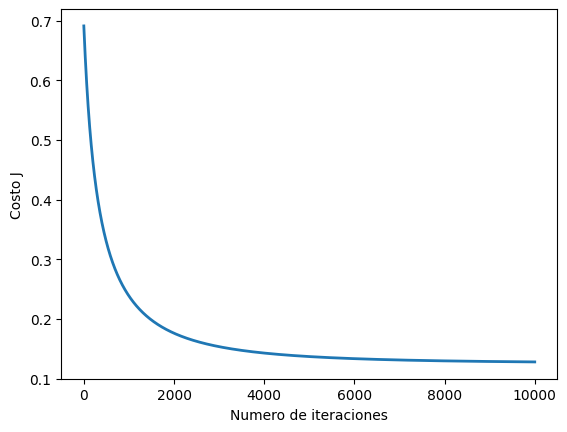

In [33]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(31)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 0.000e+00, 1.700e+02, 2.017e+03, 0.000e+00, 1.700e+01, 2.700e+01, 0.000e+00, 3.000e+00, 2.000e+00,
           0.000e+00, 0.000e+00, 0.000e+00, 4.300e+01, 6.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
           3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00, 2.000e+00, 1.305e+02, 0.000e+00,
           0.000e+00, 1.000e+00, 7.900e+02]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):{aprueba}")

theta calculado por el descenso por el gradiente: [-0.79669562 -0.12629282  0.18711523  0.24047349 -0.04128514  0.00606241
  0.02181491  0.04570371  0.05648556  0.00703951  0.05140433 -0.00389352
 -0.01348323  0.359476    0.12471696  0.04815334 -0.04351584  0.18069239
 -0.04397706  0.10485849 -0.16911773 -0.11705409  0.5999033   0.01291899
 -0.05293473 -0.11007265  0.13580062 -0.32324888 -0.24067807 -2.65591009
 -0.24993327]
Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):1.0


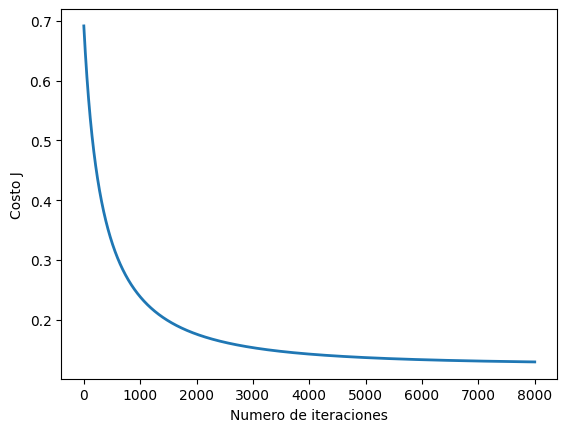

In [34]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 8000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(31)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 0.000e+00, 8.200e+01, 2.015e+03, 5.000e+00, 2.900e+01, 1.600e+01, 0.000e+00, 3.000e+00, 2.000e+00,
           0.000e+00, 0.000e+00, 0.000e+00, 1.350e+02, 6.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
           0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00, 2.000e+00, 7.650e+01, 0.000e+00,
           0.000e+00, 0.000e+00, 1.360e+02]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):{aprueba}")

theta calculado por el descenso por el gradiente: [-0.79669562 -0.12629282  0.18711523  0.24047349 -0.04128514  0.00606241
  0.02181491  0.04570371  0.05648556  0.00703951  0.05140433 -0.00389352
 -0.01348323  0.359476    0.12471696  0.04815334 -0.04351584  0.18069239
 -0.04397706  0.10485849 -0.16911773 -0.11705409  0.5999033   0.01291899
 -0.05293473 -0.11007265  0.13580062 -0.32324888 -0.24067807 -2.65591009
 -0.24993327]
Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):1.0


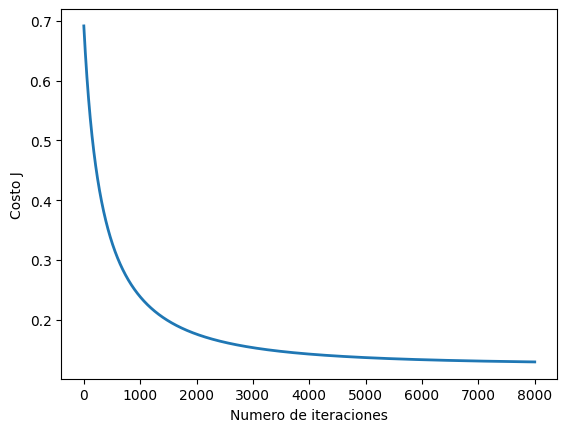

In [35]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 8000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(31)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 0.000e+00, 2.500e+01, 2.016e+03, 2.000e+00, 5.300e+01, 2.700e+01, 0.000e+00, 3.000e+00, 3.000e+00,
           0.000e+00, 0.000e+00, 0.000e+00, 2.500e+01, 5.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
           0.000e+00, 9.000e+00, 2.000e+00, 0.000e+00, 2.200e+02, 0.000e+00, 3.000e+00, 6.000e+01, 0.000e+00,
           1.000e+00, 1.000e+00, 6.690e+02]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):{aprueba}")

theta calculado por el descenso por el gradiente: [-0.79669562 -0.12629282  0.18711523  0.24047349 -0.04128514  0.00606241
  0.02181491  0.04570371  0.05648556  0.00703951  0.05140433 -0.00389352
 -0.01348323  0.359476    0.12471696  0.04815334 -0.04351584  0.18069239
 -0.04397706  0.10485849 -0.16911773 -0.11705409  0.5999033   0.01291899
 -0.05293473 -0.11007265  0.13580062 -0.32324888 -0.24067807 -2.65591009
 -0.24993327]
Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):1.0


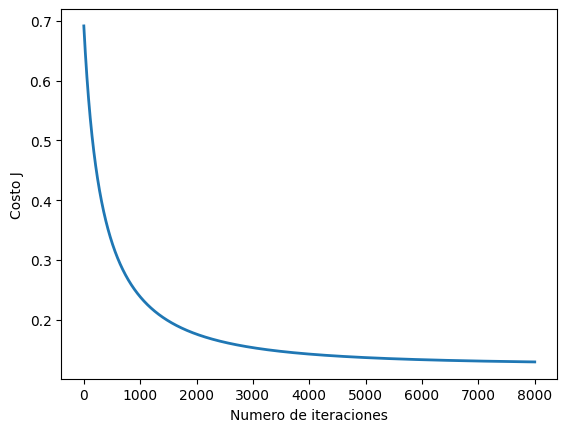

In [36]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 8000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(31)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 0.000e+00, 1.000e+00, 2.016e+03, 7.000e+00, 1.100e+01, 9.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
           1.540e+02, 6.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00,
           3.000e+00, 9.500e+01, 0.000e+00, 0.000e+00, 1.000e+00, 3.740e+02]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):{aprueba}")